<a href="https://colab.research.google.com/github/Leerish/Deep-Learning-Notebooks/blob/main/Nueral_Network_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Nueral Network Classification with TensorFlow

A Classification problem is where we classify something as one thing or other
* Binary Classification
* Multiclass Classification
* Multilabel Classification

## Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create Circles
x , y = make_circles(n_samples , noise = 0.03 , random_state =42)

In [ ]:
# Check out Features
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our Data is little hard to understand , let's visualize it

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0":x[:,0] , "X1":x[:,1] ,"label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


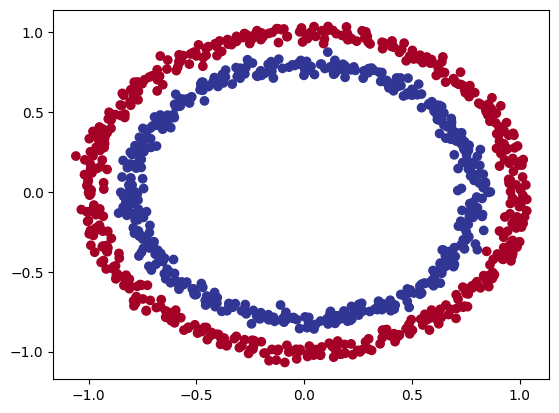

In [ ]:
# Visualize with the a plot
import matplotlib.pyplot as plt
plt.scatter(x[:,0] , x[:, 1] , c =y , cmap=plt.cm.RdYlBu);

Checkout : playground.tensorflow.com

## Input and Output Shapes

In [ ]:
x.shape , y.shape

((1000, 2), (1000,))

In [ ]:
len(x) , len(y)

(1000, 1000)

In [ ]:
x[0] , y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in Modelling

The Steps in modelling with TensorFlow are typically:
* Create or Import Model
* Compile the Model
* Fit the Model
* Evauluate the model
* Tweak
* Again Evaluate

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.14.0


In [ ]:
# Set Random Seed
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# 2. Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

# 3.Fitting our model
model.fit(x , y , epochs= 5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 5.3439 - accuracy: 0.4890
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 4.3182 - accuracy: 0.4560
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 1.2332 - accuracy: 0.4880
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7276 - accuracy: 0.4950
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7037 - accuracy: 0.4980


In [ ]:
model.fit(x , y , epochs = 200 , verbose=0)

In [ ]:
model.evaluate( x , y)

32/32 [==============================] - 1s 4ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we're working on a binary classification problem and our model is getting a accuracy of 50%

Let's add a new layers

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1.Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])
# 2.Compile the model
model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["accuracy"])
#Fit the model
model.fit(x , y , epochs= 100 )

Epoch 1/100
32/32 [==============================] - 1s 5ms/step - loss: 5.8919 - accuracy: 0.4880
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 3.1495 - accuracy: 0.5110
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7336 - accuracy: 0.4790
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7020 - accuracy: 0.4770
Epoch 5/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6962 - accuracy: 0.4770
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.4890
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.5010
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4730
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4920
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5060
Epoch 11/

In [ ]:
# 4. Evaluate the model
model.evaluate(x , y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6932187080383301, 0.5]

## Improving our model

1. Create a model - Add more layers or increase
2. Compiling the model - Here we might want to choose a different optimization Function
3. Fitting a model - fit our model for more epochs

In [ ]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
#2. Compile the model
model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# 3.Fit the  model
model.fit(x , y , epochs = 100 , verbose = 0)

In [ ]:
result = model.evaluate(x , y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6987 - accuracy: 0.5090


## Create a plotting function

* Input as Features(X) and labels(Y)
* Create a meshgrid of different x values
* Make Predictions across meshgrid
* Plot Predictions as well as a line between zones

In [ ]:
import numpy as np

In [ ]:

def plot_decision_boundary( model , x , y):
  """
  Plots the decision boundary created by a model predicting on x.
  """

  # Define the axis boundaries  of plot and create a meshgrid
  x_min , x_max = x[: ,0].min() -0.1,x[:,0].max() + 0.1
  y_min , y_max = x[:,1].min() -0.1,x[:,1].max()+0.1
  xx , yy = np.meshgrid(np.linspace(x_min , x_max , 100) , np.linspace(x_min , x_max , 100))

  x_in = np.c_[xx.ravel() , yy.ravel()] # Stack 2d arrays together

  # Make Predictions
  y_pred = model.predict(x_in)

  # Check for multi-class classification
  if len(y_pred[0]) > 1:
    print("Multiclass Classification")
    y_pred = np.argmax(y_pred , axis = 1).reshape(xx.shape)
  else:
    print("Binary Classification")
    y_pred=np.round(y_pred).reshape(xx.shape)
  #Plot
  plt.contourf(xx , yy, y_pred , cmap = plt.cm.RdYlBu , alpha = 0.7)
  plt.scatter(x[:,0] , x[:,1] , c=y , s= 40 ,cmap= plt.cm.RdYlBu)
  plt.xlim(xx.min() , xx.max())
  plt.ylim(yy.min() , yy.max())

313/313 [==============================] - 1s 2ms/step
Binary Classification


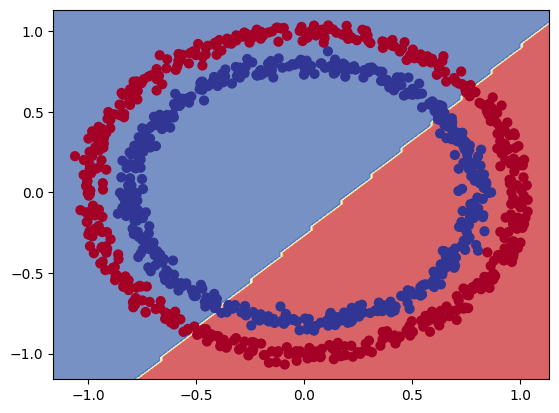

In [ ]:
# Check the predictions our model is making

plot_decision_boundary(model = model , x=x , y=y)

In [ ]:
# Let's See if our model can be used for regression problem

tf.random.set_seed(42)

# Create some data
x_regression = tf.range(0,1000, 5)
y_regression = tf.range(100 , 1100 , 5) # y= x+100

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1.Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# 2.Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(),
              metrics=["mae"])

In [ ]:
x_reg_train = x_regression[:150]
x_reg_test = x_regression[150:]

y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

model.fit(tf.expand_dims(x_reg_train , axis = -1) , y_reg_train , epochs = 100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 423.7120 - mae: 423.7120
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 292.9451 - mae: 292.9451
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 166.9479 - mae: 166.9479
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 54.7666 - mae: 54.7666
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 81.9714 - mae: 81.9714
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 83.6504 - mae: 83.6504
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 49.5124 - mae: 49.5124
Epoch 8/100
5/5 [==============================] - 0s 6ms/step - loss: 54.8524 - mae: 54.8524
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 47.9656 - mae: 47.9656
Epoch 10/100
5/5 [==============================] - 0s 5ms/step - loss: 46.8688 - mae: 46.8688
Epoch 11/100
5/5 [==============================] - 0

In [ ]:
y_reg_preds = model.predict(x_reg_test)

2/2 [==============================] - 0s 11ms/step


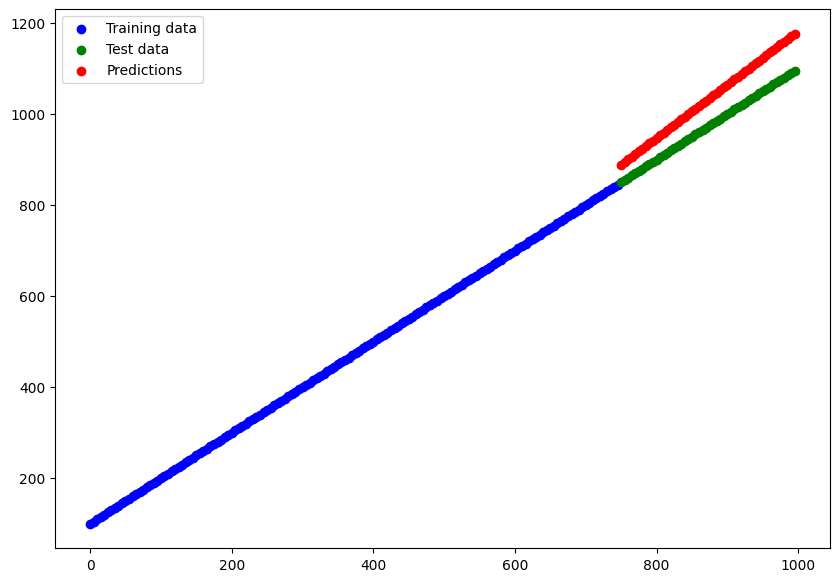

In [ ]:
plt.figure(figsize=(10 ,7))
plt.scatter(x_reg_train , y_reg_train , c="b" , label="Training data")
plt.scatter(x_reg_test , y_reg_test , c="g" , label="Test data")
plt.scatter(x_reg_test , y_reg_preds , c="r" ,label="Predictions")
plt.legend();

##Non-Linearity

In [ ]:
# Set random seed

tf.random.set_seed(42)

# 1.Create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])
# 2.Compile model
model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr = 0.0001),
              metrics=["accuracy"])
# 3.Fit the model
history = model.fit(tf.expand_dims(x, axis = -1) ,  y , epochs =100)


Epoch 1/100
32/32 [==============================] - 2s 5ms/step - loss: 4.3345 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 4.1480 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 3.9526 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 3.7346 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 3.4793 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 3.1717 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 6ms/step - loss: 2.2638 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 6ms/step - loss: 1.1292 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.9992 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.9700 - accuracy: 0.5000
Epoch 11/

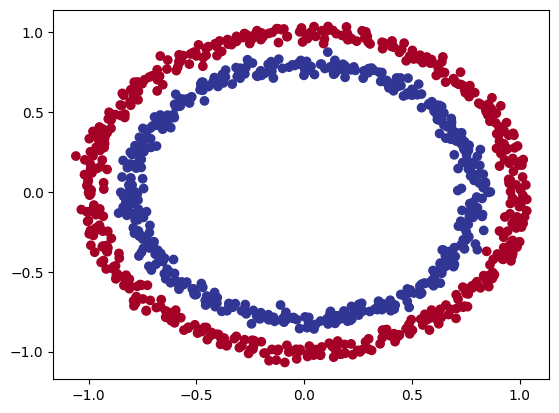

In [ ]:
plt.scatter(x[:,0] ,x[:,1] , c=y , cmap=plt.cm.RdYlBu)

313/313 [==============================] - 1s 3ms/step
Multiclass Classification


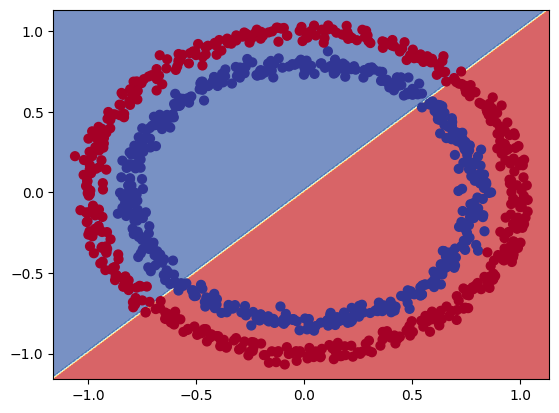

In [ ]:
# Check models decision boundary
plot_decision_boundary(model = model , x = x  , y =y)

## Building no-linear Neural Networks with a non-linear activation function

In [ ]:
# Set Random Seed
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = tf.keras.activations.relu)
])
# 2. Compile the model
model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer= tf.keras.optimizers.Adam(lr =0.0001),
              metrics = ["accuracy"])

# 3.Fit the model
model.fit(tf.expand_dims(x , axis = -1) , y , epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 6ms/step - loss: 4.2250 - accuracy: 0.4992
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1914 - accuracy: 0.4989
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1712 - accuracy: 0.5005
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1510 - accuracy: 0.4992
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 4.1373 - accuracy: 0.4999
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1054 - accuracy: 0.5008
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 4.0985 - accuracy: 0.4995
Epoch 8/100
32/32 [==============================] - 0s 9ms/step - loss: 4.0649 - accuracy: 0.5002
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0464 - accuracy: 0.4982
Epoch 10/100
32/32 [==============================] - 0s 9ms/step - loss: 4.0482 - accuracy: 0.4990
Epoch 11/

In [ ]:
# Mutilayered Nueral Network
tf.random.set_seed(42)

# 1. Create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation ="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss="binary_crossentropy",
              optimizer= tf.keras.optimizers.Adam(lr=0.0001),
              metrics =["accuracy"])

# Fit the model
history = model.fit(tf.expand_dims( x , axis = -1) , y , epochs = 250)

Epoch 1/250
32/32 [==============================] - 1s 4ms/step - loss: 4.3185 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 4ms/step - loss: 2.2791 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 4ms/step - loss: 1.1327 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 4ms/step - loss: 1.0237 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 4ms/step - loss: 0.9383 - accuracy: 0.5000
Epoch 6/250
32/32 [==============================] - 0s 3ms/step - loss: 0.8383 - accuracy: 0.5001
Epoch 7/250
32/32 [==============================] - 0s 3ms/step - loss: 0.7981 - accuracy: 0.4997
Epoch 8/250
32/32 [==============================] - 0s 3ms/step - loss: 0.7814 - accuracy: 0.4982
Epoch 9/250
32/32 [==============================] - 0s 4ms/step - loss: 0.7672 - accuracy: 0.4985
Epoch 10/250
32/32 [==============================] - 0s 5ms/step - loss: 0.7547 - accuracy: 0.5004
Epoch 11/

In [ ]:
model.evaluate(x,y)

32/32 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5027


[0.6931069493293762, 0.5027499794960022]

313/313 [==============================] - 1s 4ms/step
Multiclass Classification


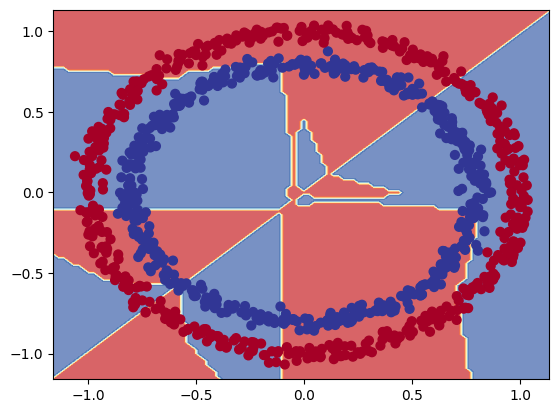

In [ ]:
plot_decision_boundary(model = model , x=x , y=y)

In [ ]:
# Mutilayered Nueral Network
tf.random.set_seed(42)

# 1. Create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation ="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1 , activation="sigmoid")
])

# Compile the model
model.compile(loss="binary_crossentropy",
              optimizer= tf.keras.optimizers.Adam(lr=0.0001),
              metrics =["accuracy"])

# Fit the model
history = model.fit(x ,  y , epochs = 100)

Epoch 1/100
32/32 [==============================] - 3s 2ms/step - loss: 0.6944 - accuracy: 0.5050
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.5030
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6929 - accuracy: 0.5140
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6923 - accuracy: 0.5100
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6919 - accuracy: 0.5100
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6913 - accuracy: 0.5080
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6908 - accuracy: 0.5190
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6903 - accuracy: 0.5480
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6899 - accuracy: 0.5560
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6896 - accuracy: 0.5130
Epoch 11/

In [ ]:
model.evaluate(x,y)

32/32 [==============================] - 0s 5ms/step - loss: 0.5623 - accuracy: 0.7550


[0.5622824430465698, 0.7549999952316284]

313/313 [==============================] - 2s 6ms/step
Binary Classification


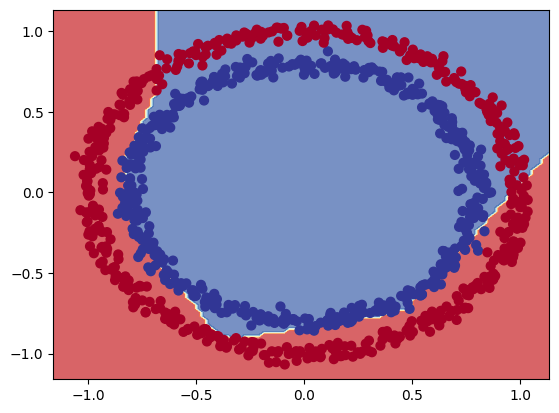

In [ ]:
# Lets visualize our metrics
plot_decision_boundary(model , x , y)

**Note** : Combination of **Straight lines** and **non-straight lines** is one of the key fundamentals of nueral network

In [ ]:
# Sample Tensor
a = tf.cast(tf.range(-10 , 10) ,tf.float32)
a

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

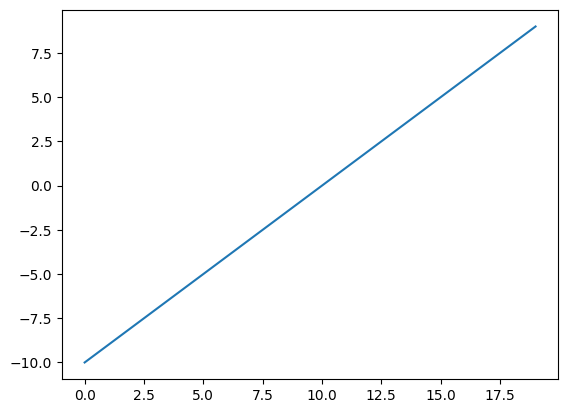

In [ ]:
plt.plot(a)

In [ ]:
# Lets start by replicating sigmoid - sig(x) = 1/(1+exp(-x))

def sigmoid(x):
  return 1/ (1+tf.exp(-x))

sig_a =sigmoid(a)

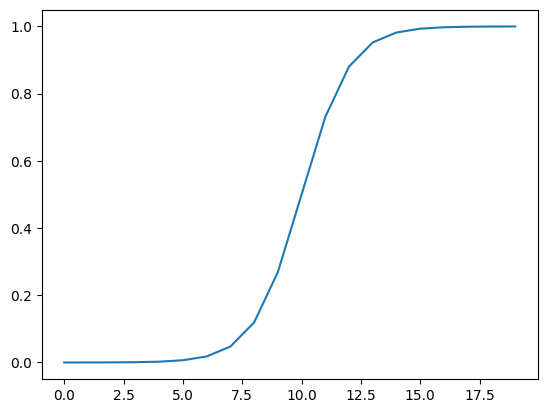

In [ ]:
plt.plot(sig_a)

In [ ]:
# Lets recreate relu Function

def relu(x):
  return tf.maximum(0,x)

# pass our data to relu()

relu(a)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

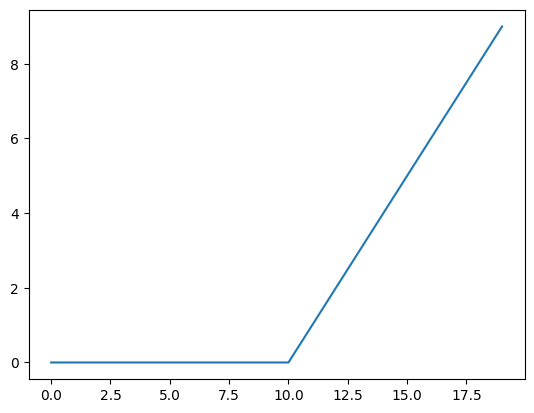

In [ ]:
plt.plot(relu(a))

In [ ]:
# Linear activation Function
tf.keras.activations.linear(a)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

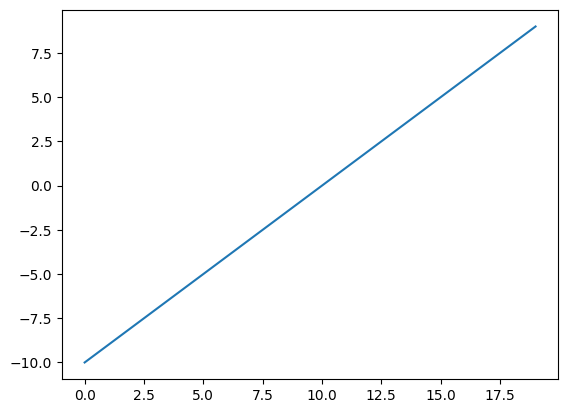

In [ ]:
plt.plot(tf.keras.activations.linear(a))

In [ ]:
a == tf.keras.activations.linear(a)
# Linear Function Doesn't change data

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improving our classification model

Creating Training and Test Set

In [ ]:
len(x)

1000

In [ ]:
# Splitting into train and test set

x_train  , y_train = x[:800] ,y[:800]
x_test , y_test = x[800:] , y[800:]


In [ ]:
# Lets Create model
tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4 , activation="relu"),
    tf.keras.layers.Dense(4 , activation = "relu"),
    tf.keras.layers.Dense(1 , activation="sigmoid")
])

# Compile the model
model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer= tf.keras.optimizers.Adam(lr=0.0001),
              metrics=["accuracy"])
# fit the model
model.fit(x_train , y_train , epochs =100)

Epoch 1/100
25/25 [==============================] - 2s 6ms/step - loss: 0.7115 - accuracy: 0.5025
Epoch 2/100
25/25 [==============================] - 0s 10ms/step - loss: 0.7072 - accuracy: 0.5075
Epoch 3/100
25/25 [==============================] - 0s 10ms/step - loss: 0.7042 - accuracy: 0.5025
Epoch 4/100
25/25 [==============================] - 0s 9ms/step - loss: 0.7022 - accuracy: 0.4925
Epoch 5/100
25/25 [==============================] - 0s 8ms/step - loss: 0.7007 - accuracy: 0.4863
Epoch 6/100
25/25 [==============================] - 0s 10ms/step - loss: 0.6998 - accuracy: 0.4812
Epoch 7/100
25/25 [==============================] - 0s 8ms/step - loss: 0.6988 - accuracy: 0.4725
Epoch 8/100
25/25 [==============================] - 0s 10ms/step - loss: 0.6982 - accuracy: 0.4762
Epoch 9/100
25/25 [==============================] - 0s 18ms/step - loss: 0.6976 - accuracy: 0.4613
Epoch 10/100
25/25 [==============================] - 0s 11ms/step - loss: 0.6970 - accuracy: 0.4412
Epo

In [ ]:
model.evaluate(x_test , y_test )

7/7 [==============================] - 0s 4ms/step - loss: 0.5530 - accuracy: 0.7900


[0.5529814958572388, 0.7900000214576721]

313/313 [==============================] - 1s 1ms/step
Binary Classification
313/313 [==============================] - 0s 2ms/step
Binary Classification


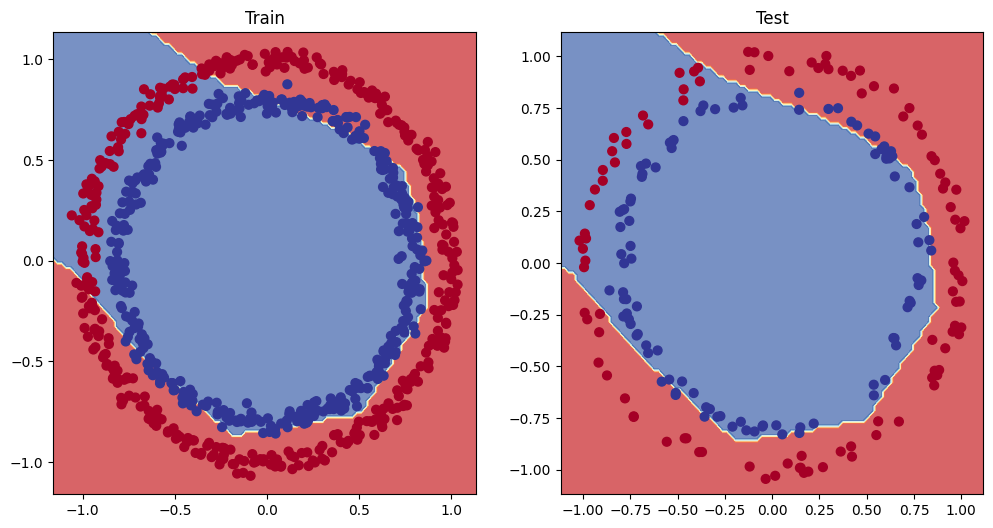

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model , x=x_train , y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model , x= x_test , y=y_test)
plt.show()

# Plot the loss (or Training) Curves

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.694418,0.505
1,0.693651,0.503
2,0.692857,0.514
3,0.692350,0.510
4,0.691891,0.510
...,...,...
95,0.573330,0.740
96,0.571000,0.731
97,0.568671,0.746
98,0.566632,0.768


Text(0.5, 1.0, 'Loss Curve')

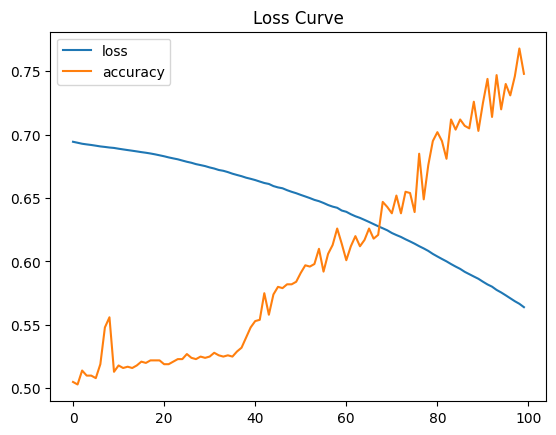

In [ ]:
# Plot Loss Curves
pd.DataFrame(history.history).plot()
plt.title("Loss Curve")

**Note:**
If Loss curve is getting low , the model is performing well and predictions are getting close to actual value

Loss Curves can be plotted by storing the predictions in a variable `history`


## Finding the best learning rate

To Find the ideal learning rate (rate where loss decreases the most during the training) we use:

* A Learning rate **CallBack** you can think of a callback as a extra piece of functionality , you can add to your *while* its training.

* Another model
* A modified loss curves plot

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4 , activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile model
model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler( lambda epoch : 1e-4 * 10 **(epoch/20))

#Fit the model
history = model.fit(x_train , y_train , epochs = 100 , callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.6947 - accuracy: 0.5088 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.5088 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.5088 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6946 - accuracy: 0.5063 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.5075 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.5050 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

Text(0.5, 1.0, 'Analysis')

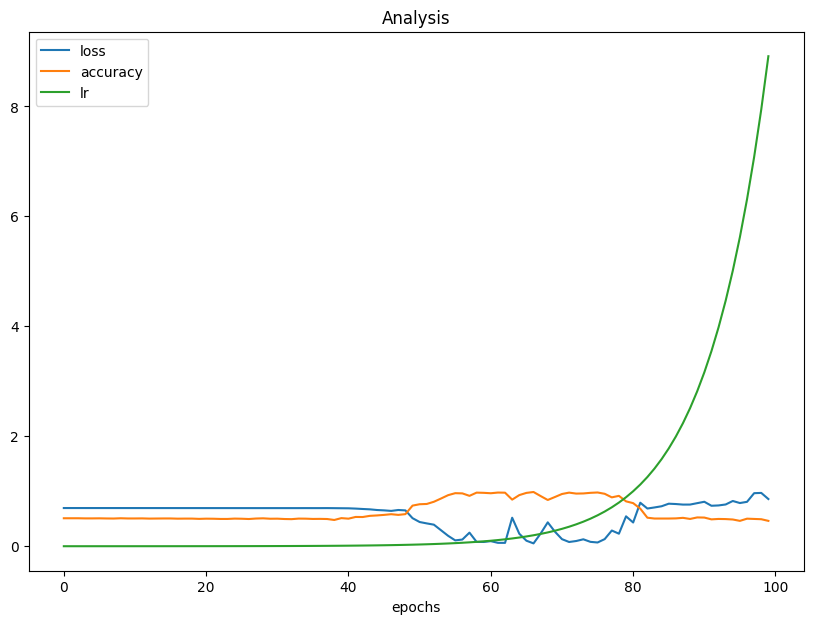

In [ ]:
# Checkout the history

pd.DataFrame(history.history).plot(figsize=(10,7) , xlabel="epochs");
plt.title("Analysis")

In [ ]:
# Plot the learning rate versus the loss
lrs = 1e-4*(10**(tf.range(100)/(20)))

Text(0.5, 1.0, 'Leerish <3 Deepthi')

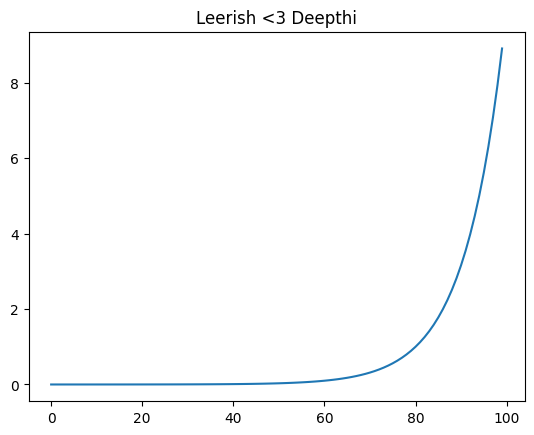

In [ ]:
plt.plot(lrs)
plt.title("Leerish <3 Deepthi")

Text(0.5, 1.0, 'Loss Curve Analysis')

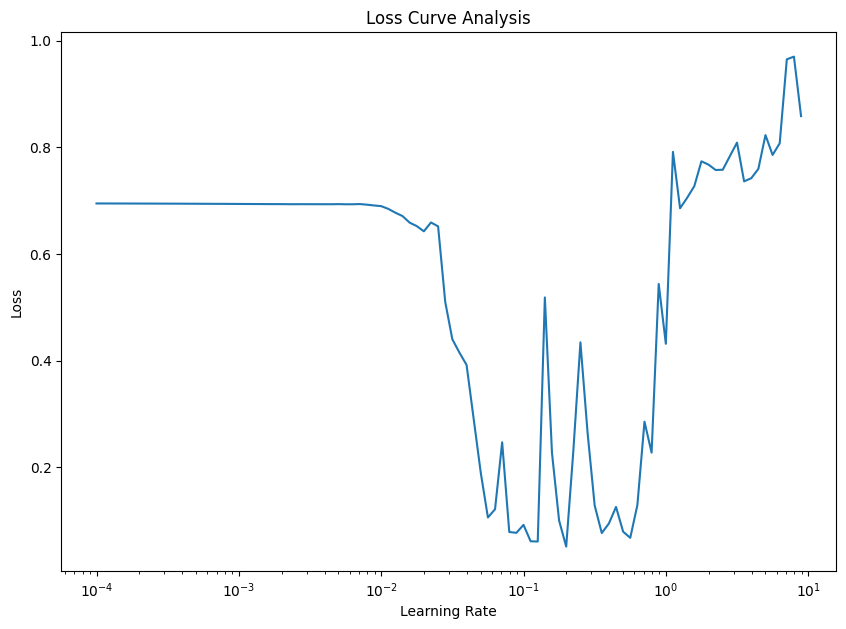

In [ ]:
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Loss Curve Analysis")

In [ ]:
# Let's  try using a higher "learning rate"

# Set random seed
tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4 , activation ="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1 , activation="sigmoid")
])

# Compile the model
model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.02),
              metrics=["accuracy"])
# Fit the model
history = model.fit(x_train , y_train , epochs = 100)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.7341 - accuracy: 0.5013
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7227 - accuracy: 0.5013
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7168 - accuracy: 0.4737
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7129 - accuracy: 0.3950
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7104 - accuracy: 0.3938
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7081 - accuracy: 0.3812
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7056 - accuracy: 0.4650
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7036 - accuracy: 0.4725
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7021 - accuracy: 0.4737
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7006 - accuracy: 0.4787
Epoch 11/

In [ ]:
model.evaluate(x_test , y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.5739 - accuracy: 0.7400


[0.5739017128944397, 0.7400000095367432]

313/313 [==============================] - 1s 2ms/step
Binary Classification
313/313 [==============================] - 1s 2ms/step
Binary Classification


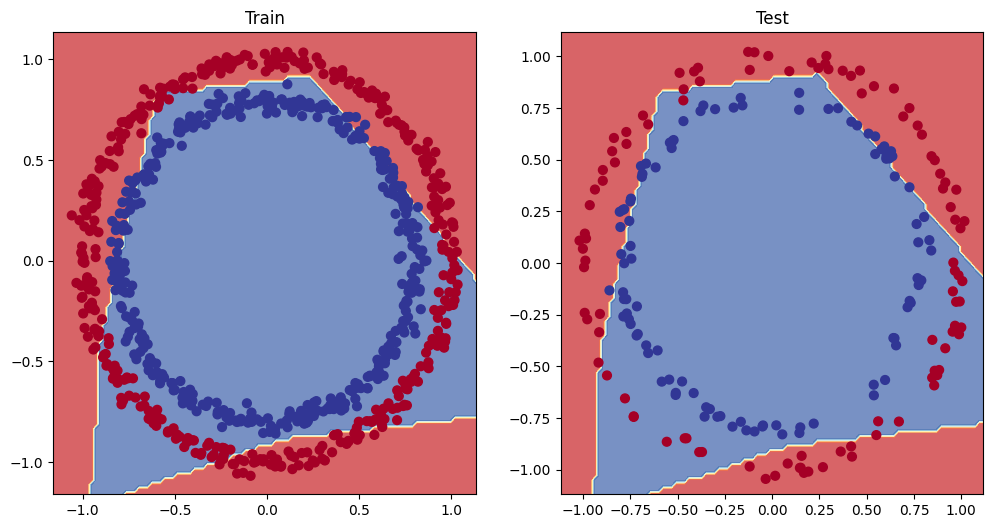

In [ ]:
# Plot the decision boundary for model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model , x = x_train , y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model , x= x_test , y= y_test )
plt.show()

# Classification evaluation methods

* Accuracy
* Precision
* Recall
* F1-score
* Confusion Matrix
* Classification Report (Scikit-Learn)

In [ ]:
# Check accuracy of model
loss , accuracy = model.evaluate(x_test , y_test)
print(f"model loss on test set:{loss}")
print(f"Model accuracy o test set:{(accuracy*100):.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.5739 - accuracy: 0.7400
model loss on test set:0.5739017128944397
Model accuracy o test set:74.00%


## Confusion Matrix
Lower Diagonal - Truth Values

Upper Diagonal - False Values

In [ ]:
# Create Confusion Matrix

from sklearn.metrics import confusion_matrix

# Make Predictions
y_preds = model.predict(x_test)




7/7 [==============================] - 0s 2ms/step


In [ ]:
y_preds[:10]

array([[0.48225164],
       [0.679855  ],
       [0.52793616],
       [0.69491935],
       [0.3492392 ],
       [0.28167245],
       [0.51597273],
       [0.37445295],
       [0.62201345],
       [0.28496474]], dtype=float32)

In [ ]:
# Convert predictions to binary
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
# Create confusion matrix
confusion_matrix(y_test , tf.round(y_preds))

array([[69, 32],
       [20, 79]])

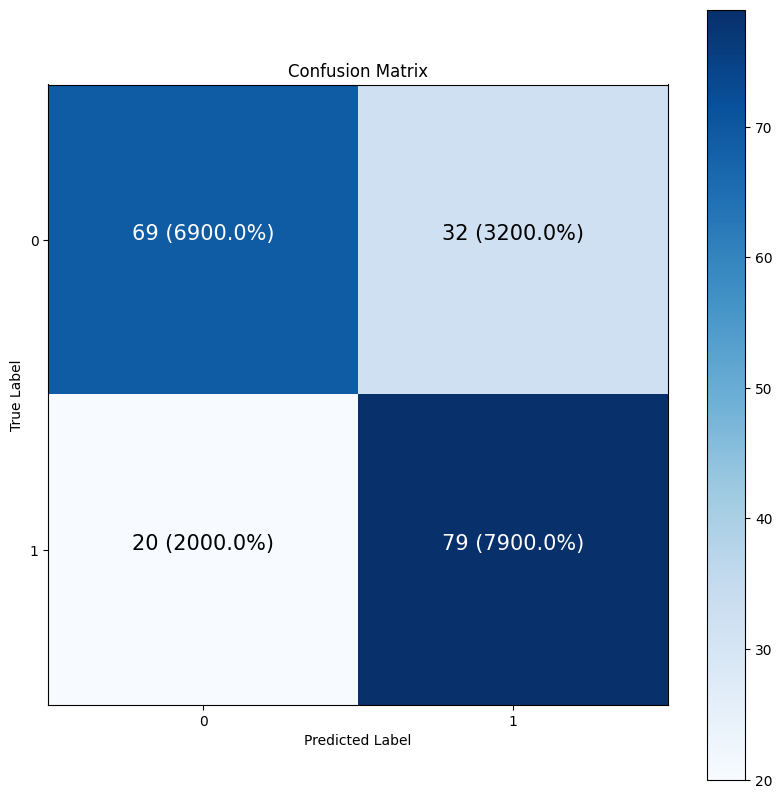

In [ ]:
# modifying confusion matrix
import itertools
figsize = (10 ,10)

# Create a confusion matrix
cm = confusion_matrix(y_test , tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis]
n_classes = cm.shape[0]
# Lets Prettify
fig , ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm , cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create Classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axis
ax.set(title = "Confusion Matrix",
       xlabel ="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set threshold for different colors
threshold = (cm.max() +cm.min()) / 2

# Set x axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

#Plot the text on each cell
for i , j in itertools.product(range(cm.shape[0]) , range(cm.shape[1])):
  plt.text(j , i , f"{cm[i,j]} ({cm[i ,j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i ,j] > threshold else "black",
           size=15)

## Working with a larger example (Multiclass classification)

When you have more than two classes as an option , it is known as **MultiClass** Classification

* This means if we have 3 different classes , it's multiclass classification
* It also means if you have 100 different classes , it means multiclass classification


If Labels are one-hot Encoded use CategoricalCrossentropy() else if in Integer Form use SparseCategoricalCrossentropy()

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data , train_labels) , (test_data , test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
# Data
print(f"Training Sample:\n{train_data[0]}\n")
print(f"Training Label:\n{train_labels[0]}\n")

Training Sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
#Shape of example
train_data[0].shape , train_labels[0].shape

((28, 28), ())

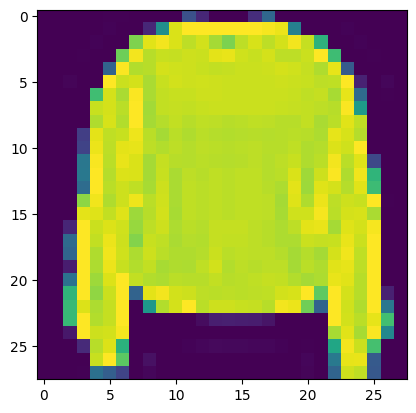

In [ ]:
# Plot a Single Sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [ ]:
# List of Class Names
class_names =["T-shirt/top" ,"Trouser" ,"Pullover" ,"Dress" ,"Coat" ,"Sandal" ,"Shirt" ,"Sneaker" ,"Bag" ,"Ankle Boot"]
len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

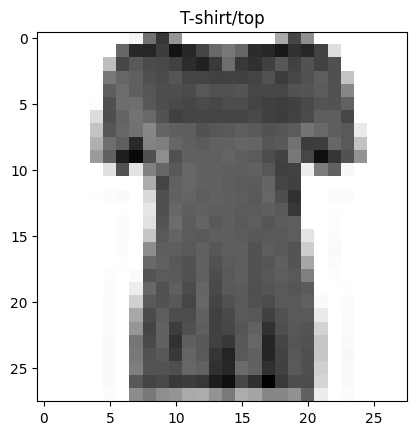

In [ ]:
# Plot and Image and Its Label
index=10
plt.imshow(train_data[index] ,cmap=plt.cm.binary)
plt.title(class_names[train_labels[index]])

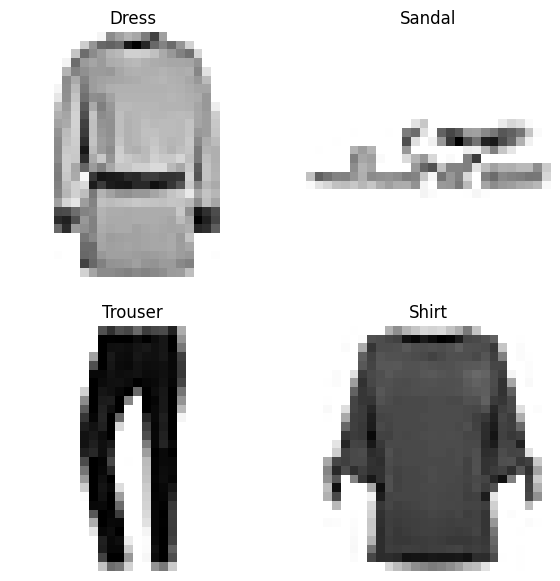

In [ ]:
# Plot Multiple Random Images of Fashion MNIST
import random
plt.figure(figsize=(7 ,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index=random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index] ,cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a Multiclass Classification Model

For a Multiclass Classification model , we can use a similar model architecture to binary-class classification model
we need change few things:
* Input shape = 28x28
* Output Shape= 10
* Loss Function= `tf.keras.CategoricalCrossentropy()`
* Output Activation Function = `softmax`

In [ ]:
# Building a model

tf.random.set_seed(42)

model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28 ,28)),
    tf.keras.layers.Dense(4 , activation ="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10 , activation="softmax")
])

model.compile(loss = tf.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

model.fit(train_data , train_labels , epochs = 10 , validation_data=(test_data , test_labels))

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 2.3752 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1001
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2711 - accuracy: 0.1169 - val_loss: 2.2280 - val_accuracy: 0.1318
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.1861 - accuracy: 0.1513 - val_loss: 2.1141 - val_accuracy: 0.1720
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.8532 - accuracy: 0.2105 - val_loss: 1.7640 - val_accuracy: 0.2210
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.7464 - accuracy: 0.2347 - val_loss: 1.6958 - val_accuracy: 0.2729
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6955 - accuracy: 0.2645 - val_loss: 1.6818 - val_accuracy: 0.2806
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6509 - accuracy: 0.2830 - val_loss: 1.6512 - val_accuracy:

In [ ]:
# Model Summary
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_32 (Dense)            (None, 4)                 3140      
                                                                 
 dense_33 (Dense)            (None, 4)                 20        
                                                                 
 dense_34 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Check the min and max values of training data
train_data.min() , train_data.max()

(0, 255)

Nueral Networks perfer data to be scaled (or normalized) , this means they like to have the numbers in the tensors they try to find patterns between 0 and 1



In [ ]:
# We can get our Training and Testing Data between 0 and 1 by dividing by the maximum

train_data_n = train_data / 255.0
test_data_n = test_data / 255.0

# Checking new data
train_data_n.min() ,train_data_n.max()

(0.0, 1.0)

In [ ]:
# Creating model for normalized data

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4 ,activation ="relu"),
    tf.keras.layers.Dense(4 ,activation="relu"),
    tf.keras.layers.Dense(10 , activation="softmax")
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics=["accuracy"])
n_history = model.fit(train_data_n , train_labels , epochs =10 , validation_data=(test_data_n , test_labels))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.2809 - accuracy: 0.5145 - val_loss: 0.9264 - val_accuracy: 0.6732
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8406 - accuracy: 0.6961 - val_loss: 0.8160 - val_accuracy: 0.7029
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7676 - accuracy: 0.7181 - val_loss: 0.7788 - val_accuracy: 0.7059
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7124 - accuracy: 0.7384 - val_loss: 0.7080 - val_accuracy: 0.7417
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6579 - accuracy: 0.7573 - val_loss: 0.7306 - val_accuracy: 0.7179
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6277 - accuracy: 0.7669 - val_loss: 0.6539 - val_accuracy: 0.7589
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6106 - accuracy: 0.7725 - val_loss: 0.6413 - val_accuracy:

**Note:** Nueral Networks tend to prefer data in numerical form in normalized from

<Axes: title={'center': 'Normalized Data'}>

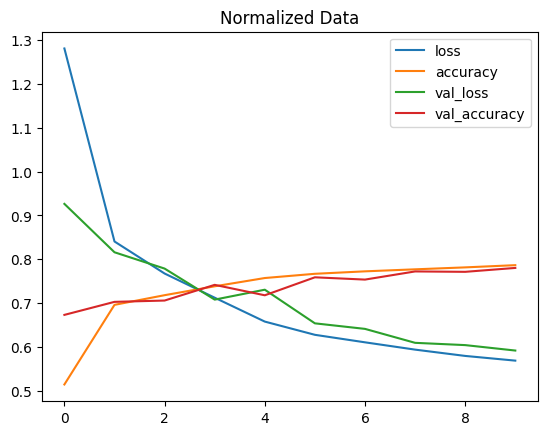

In [ ]:
import pandas as pd
# Plot non-normalised data loss curve
pd.DataFrame(n_history.history).plot(title="Normalized Data")

> When Comparing the results with *slightly* data set can produce *dramatic* results , **Compare** under same criteria , data

# Finding Ideal Learning Rate

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4 ,activation ="relu"),
    tf.keras.layers.Dense(4 ,activation="relu"),
    tf.keras.layers.Dense(10 , activation="softmax")
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Create Learning callbacks
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-3 * 10**(epoch/20))


lr_history = model.fit(train_data_n , train_labels , epochs =10 , validation_data=(test_data_n , test_labels) , callbacks=[lr_scheduler])

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 1.0866 - accuracy: 0.6011 - val_loss: 0.8130 - val_accuracy: 0.7151 - lr: 0.0010
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7222 - accuracy: 0.7567 - val_loss: 0.6822 - val_accuracy: 0.7689 - lr: 0.0011
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6391 - accuracy: 0.7857 - val_loss: 0.6571 - val_accuracy: 0.7747 - lr: 0.0013
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6094 - accuracy: 0.7948 - val_loss: 0.6291 - val_accuracy: 0.7840 - lr: 0.0014
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5931 - accuracy: 0.7972 - val_loss: 0.6100 - val_accuracy: 0.7892 - lr: 0.0016
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5820 - accuracy: 0.8005 - val_loss: 0.6163 - val_accuracy: 0.7901 - lr: 0.0018
Epoch 7/10
1875/1875 [==============================] - 6

## Evaluating our model



In [ ]:
# Confusion matrix

# modifying confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

figsize = (10 ,10)

def create_confusion(y_true  , y_preds , classes=None , figsize=(10,10)):
  # Create a confusion matrix
  cm = confusion_matrix(y_true , tf.round(y_preds))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis]
  n_classes = cm.shape[0]
  # Lets Prettify
  fig , ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm , cmap=plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axis
  ax.set(title = "Confusion Matrix",
        xlabel ="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set threshold for different colors
  threshold = (cm.max() +cm.min()) / 2

  # Set x axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  #Plot the text on each cell
  for i , j in itertools.product(range(cm.shape[0]) , range(cm.shape[1])):
    plt.text(j , i , f"{cm[i,j]} ({cm[i ,j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i ,j] > threshold else "black",
            size=15)



In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle Boot']

In [ ]:
# Make Predictions for our model
y_preds = model.predict(test_data_n)

# View the first 5 predictions
y_preds[:5]

313/313 [==============================] - 2s 5ms/step


array([[3.7061753e-08, 4.8525095e-18, 1.9379977e-10, 5.0249117e-11,
        3.3009695e-09, 5.6201541e-01, 6.9138491e-07, 7.6285489e-02,
        5.4280862e-04, 3.6115548e-01],
       [1.0096282e-03, 1.4742728e-08, 8.4507763e-01, 3.0380432e-04,
        1.3808808e-01, 5.1741823e-22, 1.5520730e-02, 0.0000000e+00,
        1.4295583e-07, 8.2591904e-34],
       [4.6003568e-10, 9.9996823e-01, 6.5563965e-10, 1.9096267e-05,
        1.2640353e-05, 3.7135539e-19, 6.1693106e-10, 1.6382068e-36,
        1.9007491e-09, 3.1528626e-29],
       [8.2520130e-10, 9.9991614e-01, 1.1513472e-10, 7.7465556e-05,
        6.3363559e-06, 2.7271879e-19, 4.2022016e-10, 4.1786880e-36,
        1.5578300e-09, 3.5377193e-28],
       [3.0981207e-01, 5.5924179e-08, 1.6146383e-01, 1.2733018e-02,
        1.9467194e-02, 4.4723006e-08, 4.9564400e-01, 1.3309838e-23,
        8.7971200e-04, 1.9402704e-12]], dtype=float32)

In [ ]:
# Convert prediction probabilities into intgers

y_probs  =y_preds.argmax(axis=1)
y_probs[:10]

array([5, 2, 1, 1, 6, 1, 4, 6, 5, 7])

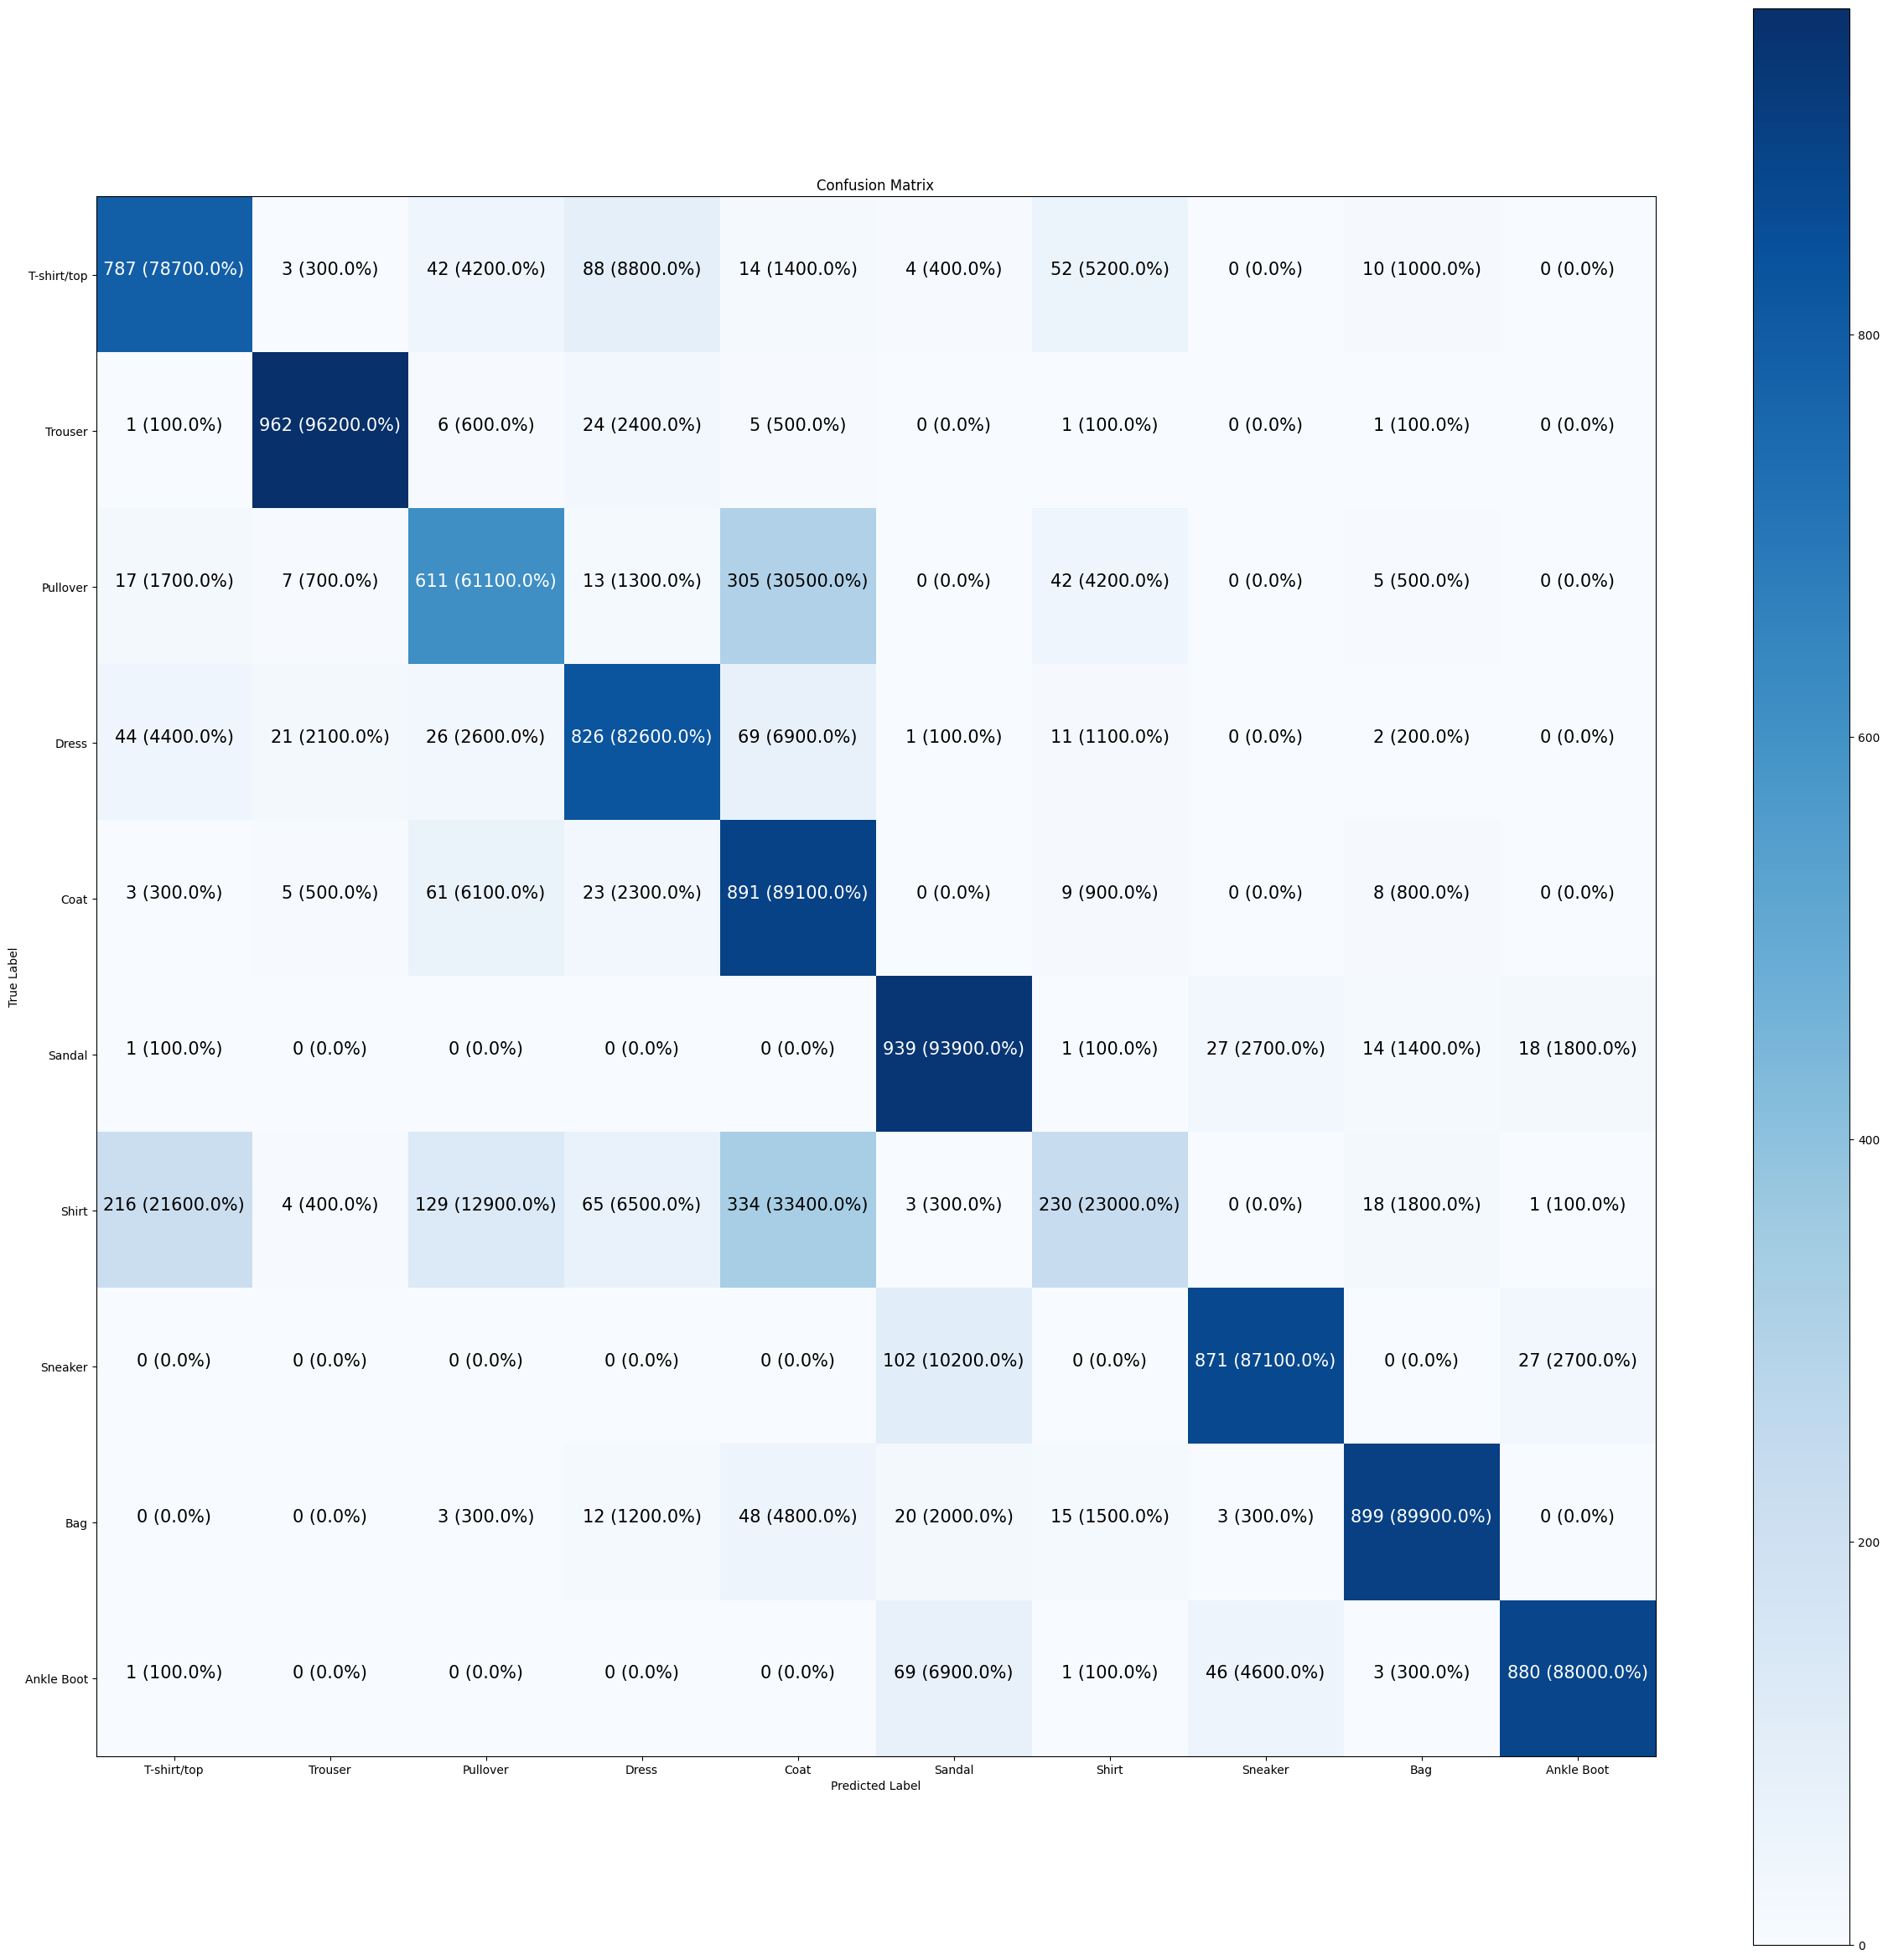

In [ ]:
create_confusion( y_true = test_labels , y_preds = y_probs ,classes =class_names , figsize=(30,30))

## Visualize the predictions

Create a function to:
* Plot a Image
* Make a Prediction

In [ ]:
import random

def plot_random_image(model , images , true_labels , classes):
  """
  Picks a random image , plots it and labels it with a prediction and truth label
  """

  # Set up a random integer

  i = random.randint(0 ,len(images))

  # Create Predictions

  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1 ,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label=classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image , cmap = plt.cm.binary)

  # Change the color
  if pred_label == true_label:
    color = "green"
  else:
    color ="red"

  # Add  x label
  plt.xlabel("Pred:{} {:2.0f}% (True:{})".format(pred_label,
                                                100*tf.reduce_max(pred_probs),
                                                true_label),
             color=color) # Color based on prediction


1/1 [==============================] - 0s 39ms/step


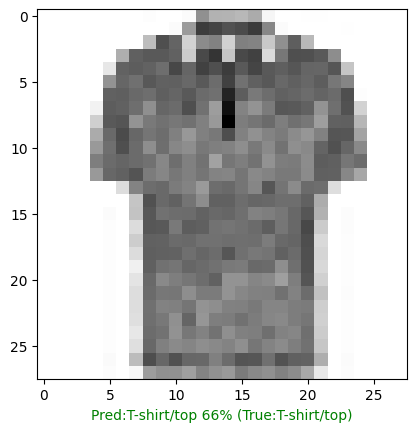

In [ ]:
# Check Random image and its predictions

plot_random_image(model = model , images=test_data_n , true_labels = test_labels, classes = class_names)

# What Patterns is our Model Learning?



In [ ]:
model.layers

In [ ]:
# Extract a particular layer
model.layers[1]

In [ ]:
# Get the patterns learned by a layer
weights , biases = model.layers[1].get_weights() # One value per data point

# Shapes
weights , weights.shape

(array([[ 5.3840470e-01, -6.2920368e-01,  4.8906815e-01,  2.4583374e-01],
        [ 4.0958127e-01, -4.5493752e-01,  7.1457505e-02,  5.2265495e-01],
        [ 1.9855706e-01, -8.2257354e-01,  6.7731309e-01,  9.0635794e-01],
        ...,
        [-7.1193546e-01, -4.3476906e-01,  5.0908005e-01,  1.7724200e-01],
        [-2.7833253e-01,  2.3578037e-01,  1.5917145e-01, -3.7019163e-01],
        [ 2.3395912e-01, -4.7158277e-01,  4.0268981e-01, -4.2357072e-04]],
       dtype=float32),
 (784, 4))

In [ ]:
## Checking the bias vector one value per hidden unit
biases , biases.shape

(array([0.55534166, 0.6274314 , 0.7306074 , 0.2384541 ], dtype=float32), (4,))

Every Nueron has a bias vector .Each of these is paired with weights matrix

The Bias vector get initialized as zeros

The Bias Vector Dictates how much patterns within the corresponding weights matrix should influence the next layer